In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\Question 2\merged_data.csv",low_memory=False)

# Question 2: Sales Performance


## 2A. Product categories that brings in the most revenues

In [8]:
# Group by product category and calculate total revenue
product_revenue = df.groupby('product_category_name_eng')['price'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='price', ascending=False)

# Display top product categories
print(product_revenue.head())


   product_category_name_eng       price
43             health_beauty  1297490.77
71             watches_gifts  1253143.30
7             bed_bath_table  1092551.02
65            sports_leisure  1023996.34
15     computers_accessories   942277.57


C:\Users\user\AppData\Local\Temp\ipykernel_8980\3423014374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_eng', data=product_revenue.head(10), palette='coolwarm')


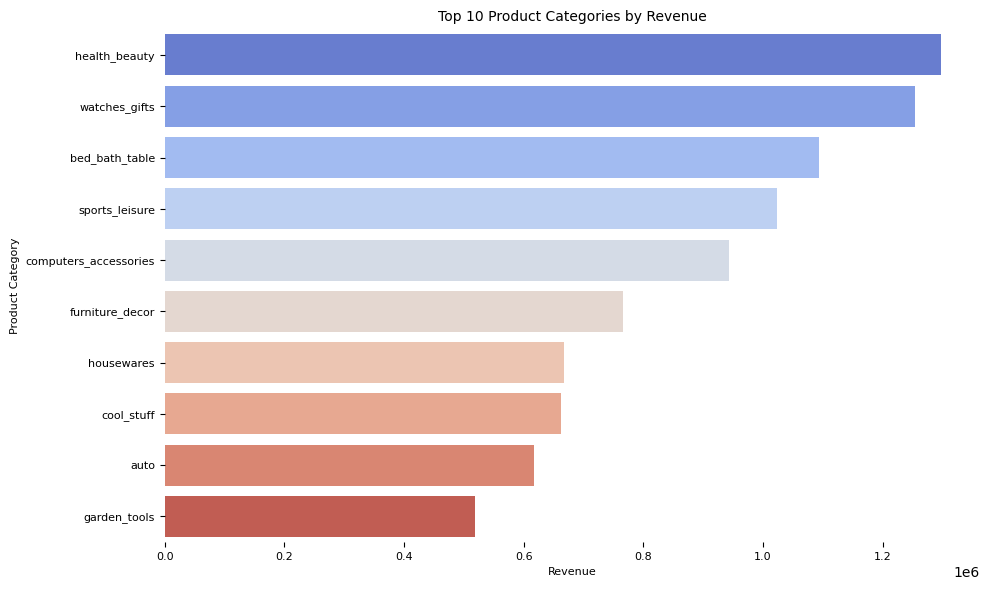

In [31]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='product_category_name_eng', data=product_revenue.head(10), palette='coolwarm')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Customize the chart
plt.title('Top 10 Product Categories by Revenue', fontsize=10)
plt.xlabel('Revenue', fontsize=8)
plt.ylabel('Product Category', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the plot
plt.savefig('Top_10_Product_Categories_by_Revenue.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 2B. Which sellers are driving the most sales

In [9]:
# Group by seller and calculate total revenue
seller_sales = df.groupby('seller_id')['price'].sum().reset_index()
seller_sales = seller_sales.sort_values(by='price', ascending=False)

# Display top sellers
print(seller_sales.head())


                             seller_id    price
178   0ee4fb99ac55ffbbc98795aa01b7f8fa  2690.00
2686  de0c78824586e9a5f5f04fd84e25df39  2139.99
61    0570350b23eda5444f8d1d9544932058  2110.00
2439  c8b3445d737de6befde0c88ede534a5e  2110.00
1545  7d7866a99a8656a42c7ff6352a433410  1999.00


C:\Users\user\AppData\Local\Temp\ipykernel_8980\804748552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='seller_id', data=seller_sales.head(10), palette='viridis')


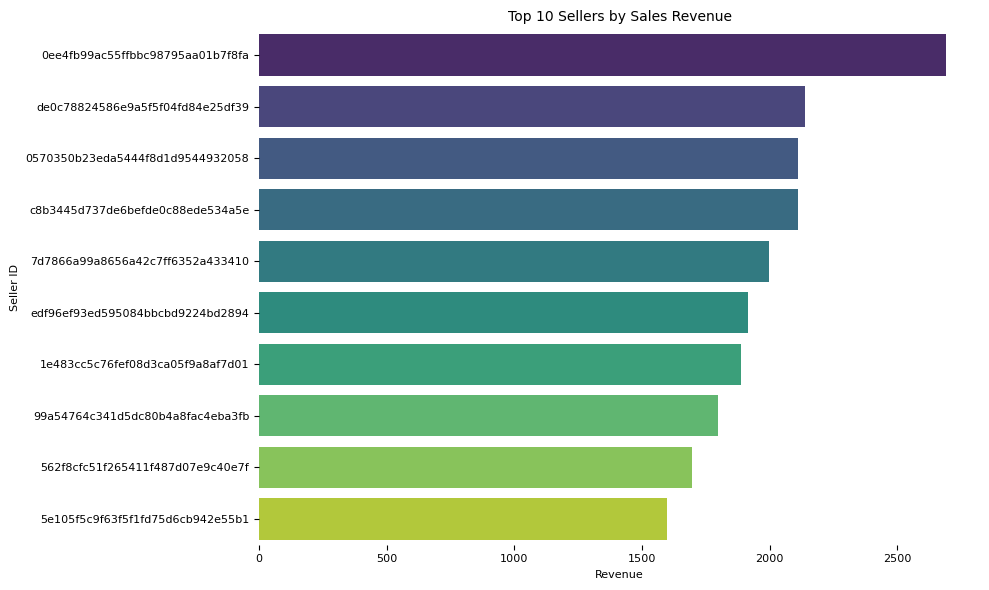

In [32]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='seller_id', data=seller_sales.head(10), palette='viridis')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Customize the chart
plt.title('Top 10 Sellers by Sales Revenue', fontsize=10)
plt.xlabel('Revenue', fontsize=8)
plt.ylabel('Seller ID', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the plot
plt.savefig('Top_10_Sellers_by_Sales_Revenue.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 2C. How do our customers prefer to pay, and is there a dominant payment method?

In [29]:
# Count payment methods
payment_methods = df['payment_type'].value_counts().reset_index()
payment_methods.columns = ['payment_type', 'count']

# Display payment preferences
print(payment_methods)


  payment_type  count
0  credit_card  87286
1       boleto  23037
2      voucher   6407
3   debit_card   1698


C:\Users\user\AppData\Local\Temp\ipykernel_8980\3016505442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='payment_type', data=payment_methods, palette='Blues')


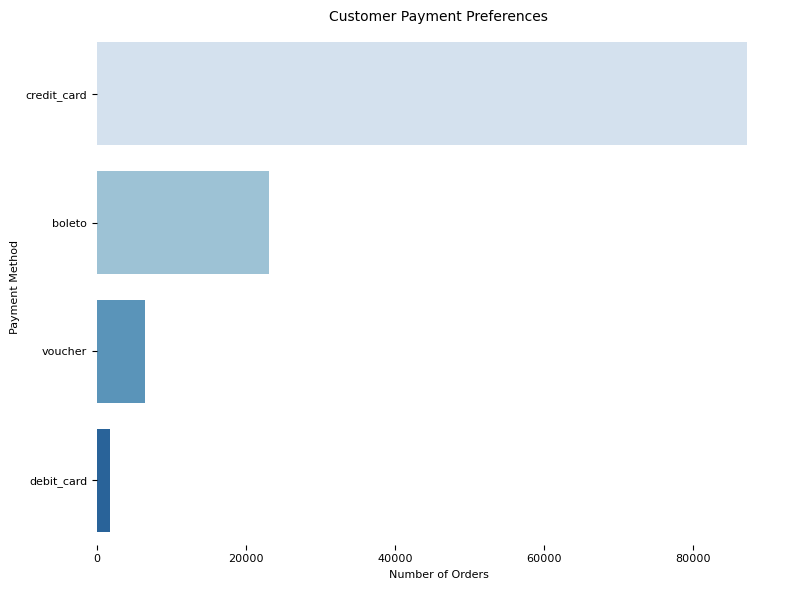

In [33]:
# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='payment_type', data=payment_methods, palette='Blues')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Customize the chart
plt.title('Customer Payment Preferences', fontsize=10)
plt.xlabel('Number of Orders', fontsize=8)
plt.ylabel('Payment Method', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the plot
plt.savefig('Customer_Payment_Preferences.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [28]:
df = df[~df['payment_type'].isin(['not_defined', 'UNKNOWN'])]


## 2D. product categories that are performing better in some states compared to others?


In [21]:
# Group by product category to calculate total revenue
total_revenue_by_category = df.groupby('product_category_name_eng')['price'].sum().reset_index()

#  Sort and get the top 10 product categories
top_10_categories = total_revenue_by_category.sort_values(by='price', ascending=False).head(10)

#  Filter the original data to include only top 10 product categories
top_categories_data = df[df['product_category_name_eng'].isin(top_10_categories['product_category_name_eng'])]

#  Group by product category and state, then calculate total revenue
category_state_sales = top_categories_data.groupby(['product_category_name_eng', 'customer_state'])['price'].sum().reset_index()

#  Pivot the data for better readability
category_state_pivot = category_state_sales.pivot(index='customer_state', columns='product_category_name_eng', values='price')

In [22]:
category_state_pivot

product_category_name_eng,auto,bed_bath_table,computers_accessories,cool_stuff,furniture_decor,garden_tools,health_beauty,housewares,sports_leisure,watches_gifts
customer_state,,,,,,,,,,
AC,606.97,567.70,1290.48,99.99,1316.44,629.00,1386.58,513.06,1677.46,2351.20
AL,4578.54,2023.04,7714.36,2860.91,3713.29,1748.07,13527.63,1020.36,3965.68,12694.18
AM,723.90,791.10,2044.71,638.88,215.28,1980.88,2925.68,408.69,1471.60,1811.35
AP,1216.39,669.50,2254.52,314.00,270.80,239.99,1380.58,490.49,887.69,1639.80
BA,30887.80,26971.00,34724.03,27240.19,24842.02,24890.94,56287.59,17978.94,40032.14,51471.49
CE,14095.49,7305.19,13901.71,12235.40,9331.24,6528.43,34421.08,8329.52,10751.42,31229.78
DF,17389.04,16650.81,25456.20,12580.16,12080.71,9247.14,30662.51,13140.15,22868.67,33684.26
ES,14264.56,23915.85,15490.55,11344.72,12942.62,10912.23,20342.99,12218.92,20662.59,29621.00
GO,11430.65,23857.04,13974.13,22758.08,12669.88,15407.17,28403.19,15121.89,20663.15,38218.61


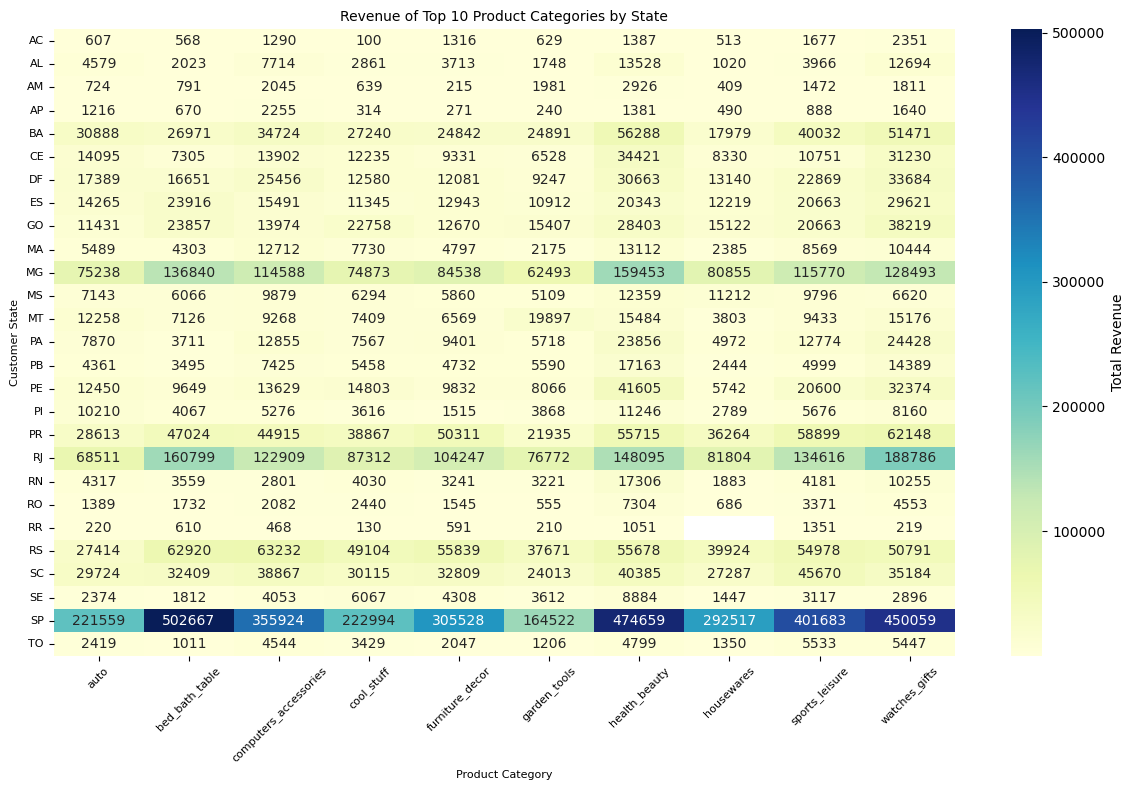

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(category_state_pivot, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Total Revenue'})

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Customize the chart
plt.title('Revenue of Top 10 Product Categories by State', fontsize=10)
plt.xlabel('Product Category', fontsize=8)
plt.ylabel('Customer State', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

## 2E. Order volumes trending over time


In [60]:
# Convert order_purchase_timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Group by month and count orders
order_trend = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['order_id'].count().reset_index()

# Rename columns for clarity
order_trend.columns = ['month', 'order_count']

In [76]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_category_name_eng', 'product_weight_g', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'month'],
      dtype='object')

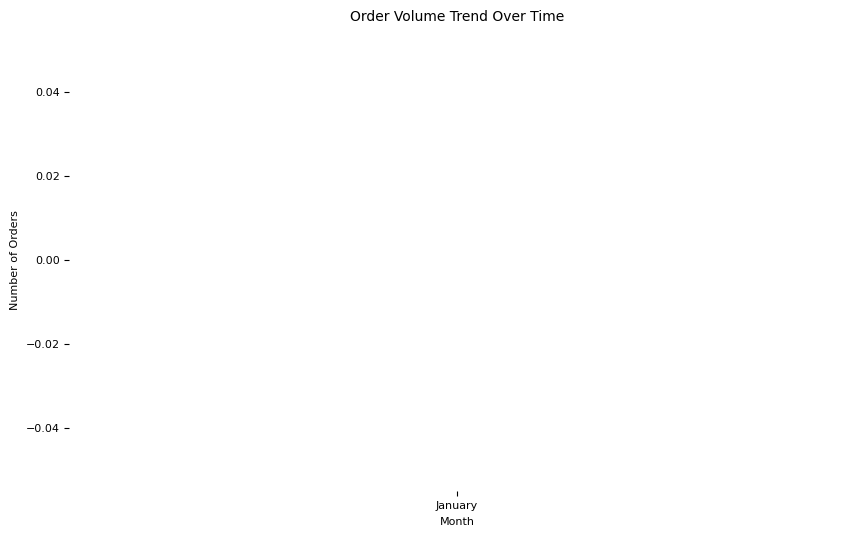

In [75]:
# Convert 'month' to a categorical type if it's not numeric
# Assuming 'month' is in string format, like "January", "February", etc.
order_trend_clean['month'] = pd.Categorical(order_trend_clean['month'], 
                                            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                        'July', 'August', 'September', 'October', 'November', 'December'], 
                                            ordered=True)

# Convert 'order_count' to numeric, forcing invalid parsing to NaN, then drop those rows
order_trend_clean['order_count'] = pd.to_numeric(order_trend_clean['order_count'], errors='coerce')

# Drop rows where 'order_count' is NaN (non-numeric values)
order_trend_clean = order_trend_clean.dropna(subset=['order_count'])

# Create the plot after cleaning
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='order_count', data=order_trend_clean, marker='o', color='green')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Set title and labels
plt.title('Order Volume Trend Over Time', fontsize=10)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of Orders', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()


In [72]:
# Convert 'order_purchase_timestamp' to datetime
df['month'] = pd.to_datetime(df['month'])

# Create a new 'month' column
df['month'] = df['order_purchase_timestamp'].dt.month

# Display the first few rows to confirm the 'month' column
print(df[['order_purchase_timestamp', 'month']].head())

  order_purchase_timestamp  month
0      2017-10-02 10:56:00     10
1      2017-10-02 10:56:00     10
2      2017-10-02 10:56:00     10
3      2018-07-24 20:41:00      7
4      2018-08-08 08:38:00      8


In [74]:
# Define the month variable if it contains month names
order_trend_clean['month'] = pd.Categorical(
    order_trend_clean['month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'], 
    ordered=True
)
# Convert 'month' to integer (if needed)
order_trend_clean['month'] = pd.to_numeric(order_trend_clean['month'], errors='coerce')

# If 'month' column contains numbers, convert it to month names
order_trend_clean['month'] = order_trend_clean['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Then convert to a categorical variable
order_trend_clean['month'] = pd.Categorical(
    order_trend_clean['month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'], 
    ordered=True
)



In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='order_count', data=order_trend_clean, marker='o', color='green')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Set title and labels
plt.title('Order Volume Trend Over Time', fontsize=10)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of Orders', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018,1,-1,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018,1,-1,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


# 2F Average revenue per order, and how does that vary depending on where the customer is located?

In [38]:
# Group by state and calculate total revenue and order count
state_revenue = df.groupby('customer_state').agg({'price': 'sum', 'order_id': 'count'}).reset_index()

# Calculate average revenue per order
state_revenue['avg_revenue_per_order'] = state_revenue['price'] / state_revenue['order_id']

# Display the result
print(state_revenue)


   customer_state       price  order_id  avg_revenue_per_order
0              AC    17059.44        95             179.573053
1              AL    83260.16       460             181.000348
2              AM    22884.26       172             133.048023
3              AP    13654.30        84             162.551190
4              BA   543133.90      4071             133.415352
5              CE   240092.34      1560             153.905346
6              DF   314266.46      2489             126.262137
7              ES   284572.03      2347             121.249267
8              GO   310807.92      2443             127.223872
9              MA   123406.09       851             145.013032
10             MG  1647126.83     13738             119.895678
11             MS   120272.81       849             141.664087
12             MT   171121.64      1129             151.569212
13             PA   184857.28      1122             164.756934
14             PB   124025.94       643             192

C:\Users\user\AppData\Local\Temp\ipykernel_8980\485516796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='avg_revenue_per_order', data=state_revenue, palette='magma')


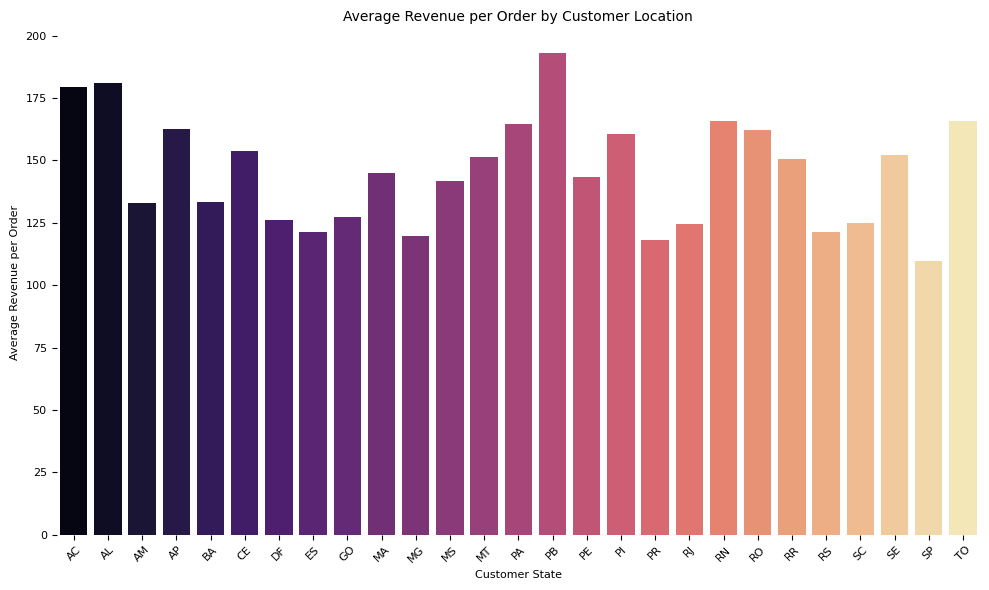

In [39]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_state', y='avg_revenue_per_order', data=state_revenue, palette='magma')

# Remove spines and gridlines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(False)

# Customize the chart
plt.title('Average Revenue per Order by Customer Location', fontsize=10)
plt.xlabel('Customer State', fontsize=8)
plt.ylabel('Average Revenue per Order', fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the plot
plt.savefig('Average_Revenue_per_Order_by_Customer_Location.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8980\96562489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_eng', data=product_revenue.head(10), palette='coolwarm', ax=axes[0, 0])
C:\Users\user\AppData\Local\Temp\ipykernel_8980\96562489.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='seller_id', data=seller_sales.head(10), palette='viridis', ax=axes[0, 1])
C:\Users\user\AppData\Local\Temp\ipykernel_8980\96562489.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='payment_

TypeError: Invalid object type at position 0

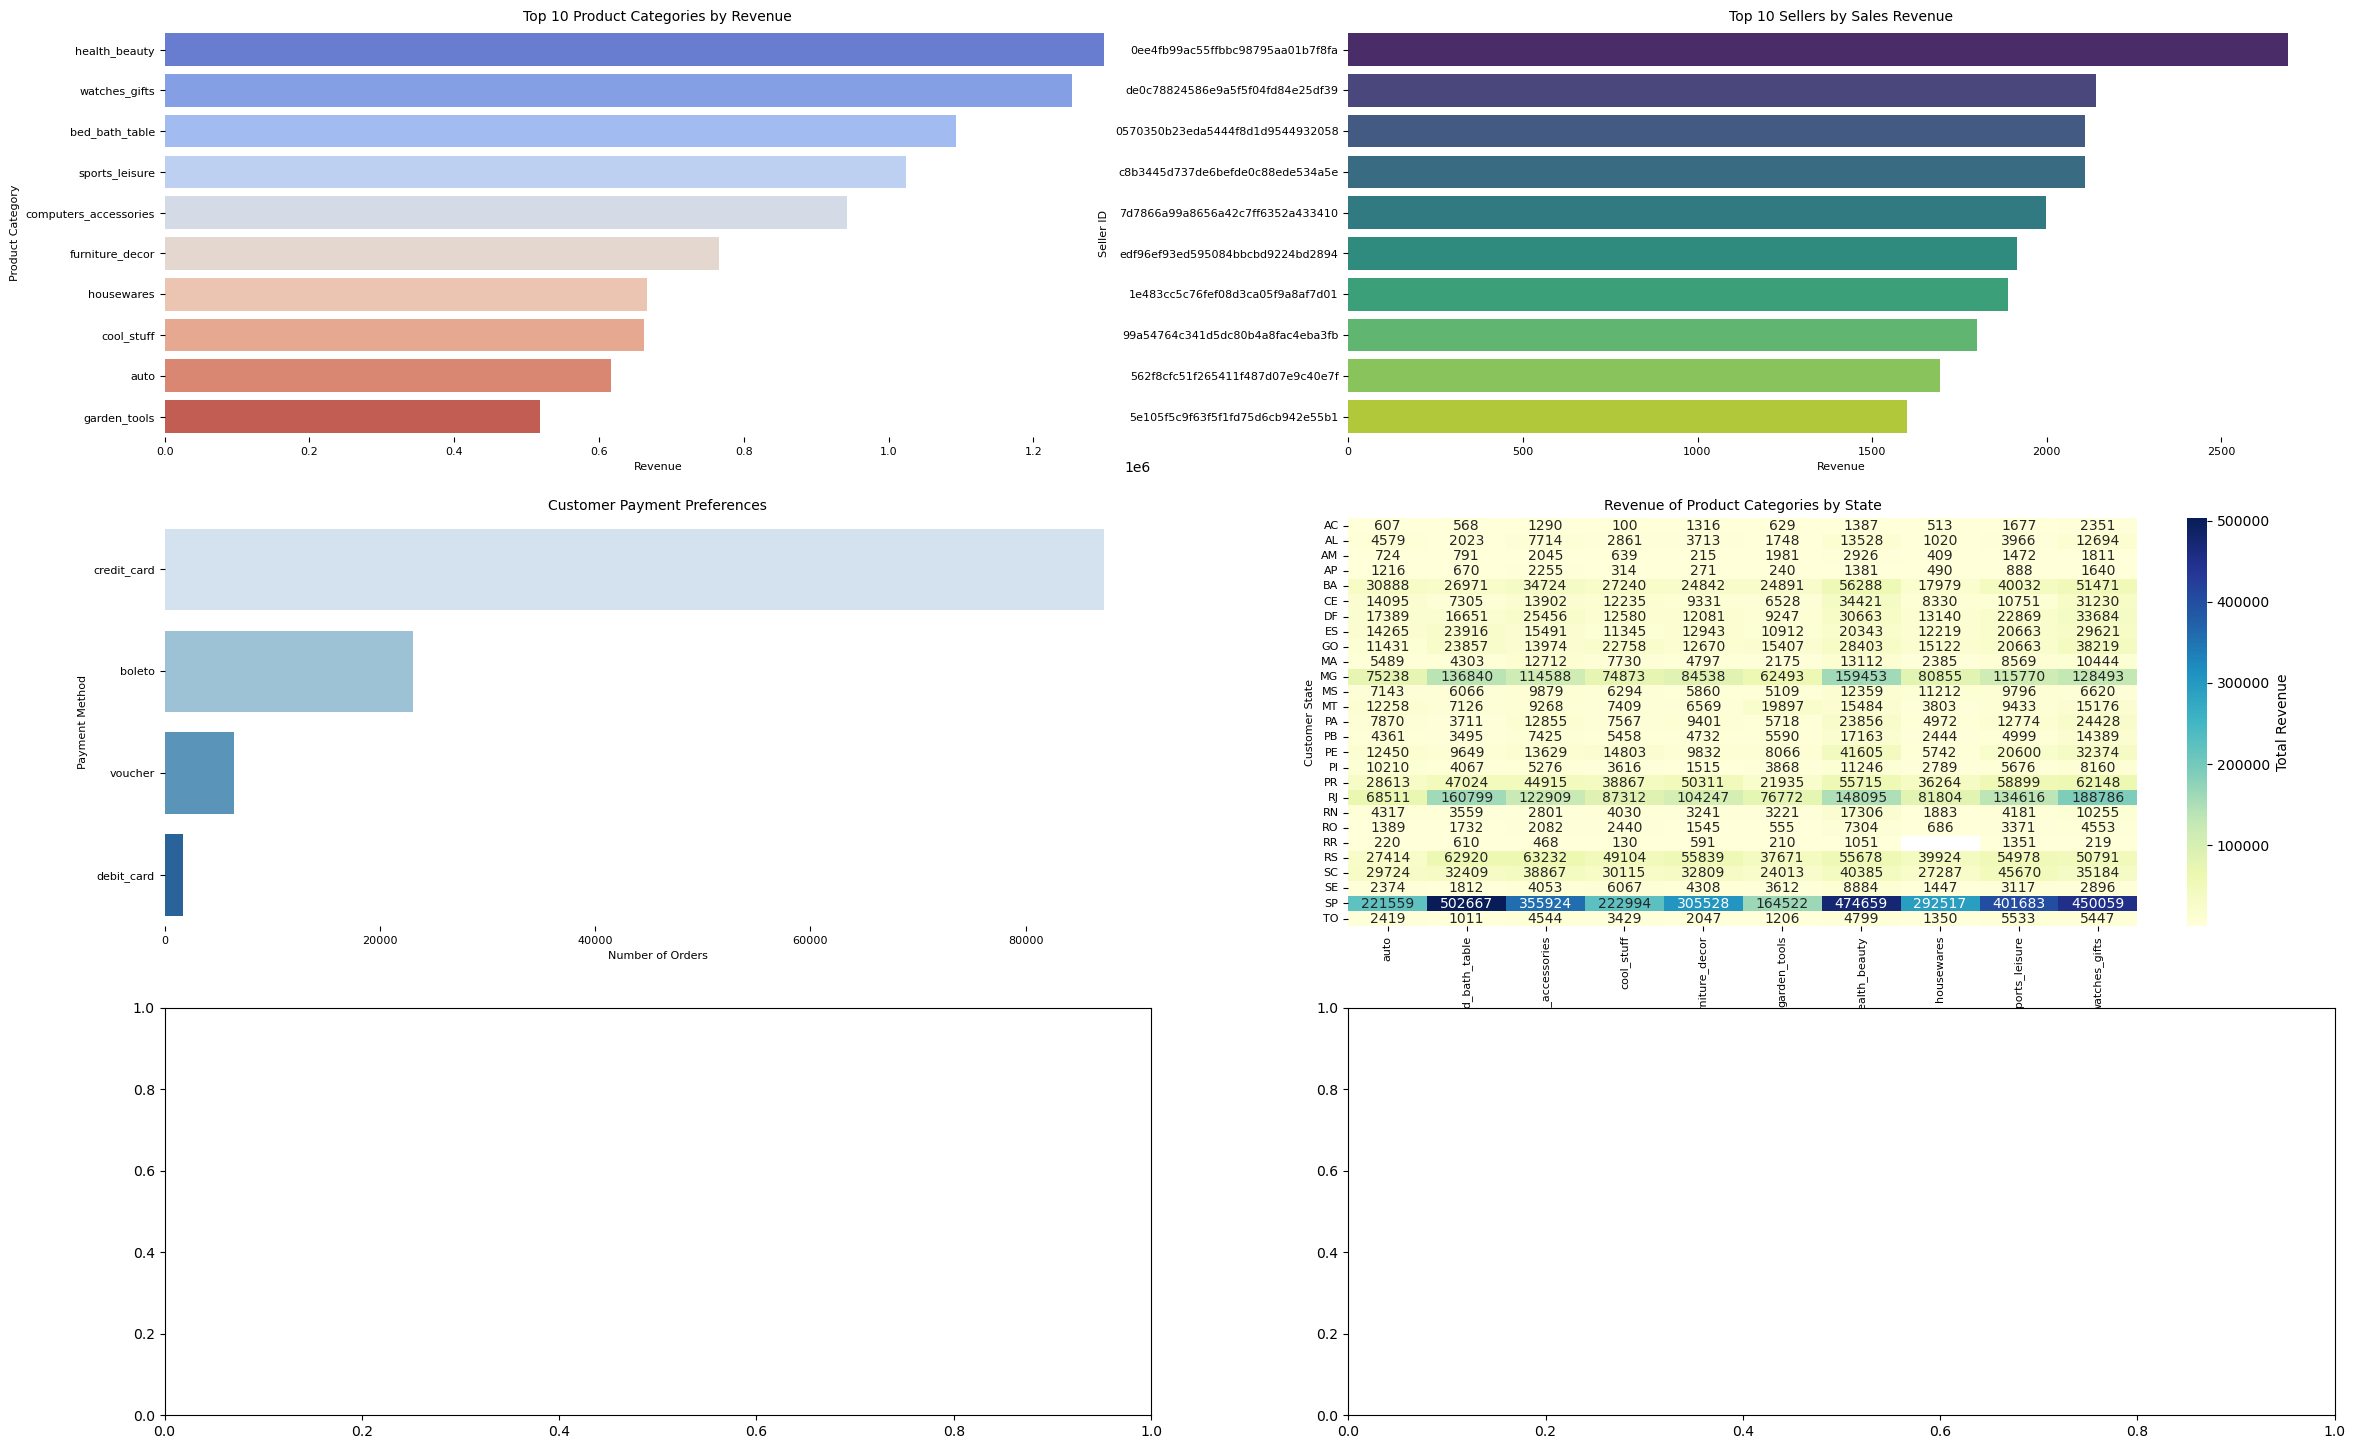

In [43]:
# Create a figure with 3 rows and 2 columns (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(28, 18))

# 1. Top 10 Product Categories by Revenue
sns.barplot(x='price', y='product_category_name_eng', data=product_revenue.head(10), palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Product Categories by Revenue', fontsize=10)
axes[0, 0].set_xlabel('Revenue', fontsize=8)
axes[0, 0].set_ylabel('Product Category', fontsize=8)
axes[0, 0].tick_params(labelsize=8)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[0, 0])
axes[0, 0].grid(False)

# 2. Top 10 Sellers by Sales Revenue
sns.barplot(x='price', y='seller_id', data=seller_sales.head(10), palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Sellers by Sales Revenue', fontsize=10)
axes[0, 1].set_xlabel('Revenue', fontsize=8)
axes[0, 1].set_ylabel('Seller ID', fontsize=8)
axes[0, 1].tick_params(labelsize=8)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[0, 1])
axes[0, 1].grid(False)

# 3. Customer Payment Preferences
sns.barplot(x='count', y='payment_type', data=payment_methods, palette='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Customer Payment Preferences', fontsize=10)
axes[1, 0].set_xlabel('Number of Orders', fontsize=8)
axes[1, 0].set_ylabel('Payment Method', fontsize=8)
axes[1, 0].tick_params(labelsize=8)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[1, 0])
axes[1, 0].grid(False)

# 4. Product Categories Performance by State (Heatmap)
sns.heatmap(category_state_pivot, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Total Revenue'}, ax=axes[1, 1])
axes[1, 1].set_title('Revenue of Product Categories by State', fontsize=10)
axes[1, 1].set_xlabel('Product Category', fontsize=8)
axes[1, 1].set_ylabel('Customer State', fontsize=8)
axes[1, 1].tick_params(labelsize=8)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[1, 1])
axes[1, 1].grid(False)

# 5. Order Volume Trend Over Time
sns.lineplot(x='month', y='order_count', data=order_trend, marker='o', color='green', ax=axes[2, 0])
axes[2, 0].set_title('Order Volume Trend Over Time', fontsize=10)
axes[2, 0].set_xlabel('Month', fontsize=8)
axes[2, 0].set_ylabel('Number of Orders', fontsize=8)
axes[2, 0].tick_params(labelsize=8)
axes[2, 0].grid(False)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[2, 0])

# 6. Average Revenue per Order by Customer Location
sns.barplot(x='customer_state', y='avg_revenue_per_order', data=state_revenue, palette='magma', ax=axes[2, 1])
axes[2, 1].set_title('Average Revenue per Order by Customer Location', fontsize=10)
axes[2, 1].set_xlabel('Customer State', fontsize=8)
axes[2, 1].set_ylabel('Average Revenue per Order', fontsize=8)
axes[2, 1].tick_params(labelsize=8)
sns.despine(left=True, right=True, top=True, bottom=True, ax=axes[2, 1])
axes[2, 1].grid(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the entire dashboard
plt.savefig('sales_performance_dashboard.png', dpi=300, bbox_inches='tight')

# Show the dashboard
plt.show()
